In [11]:
import numpy as np
from matplotlib import pyplot as plt


In [12]:
n = 100
beta = 0.95
teta = 5

In [13]:
x = np.random.uniform(teta,2*teta,n)
x = x.round(2)


In [14]:
t1_ex = np.max(x) / (((1+beta)/2) ** (1/np.size(x)) + 1)
t2_ex = np.max(x) / (((1-beta)/2) ** (1/np.size(x)) + 1)

print(f'Точный доверительный интервал: ({t1_ex}, {t2_ex})')

Точный доверительный интервал: (4.985631046360639, 5.076934895342088)


In [15]:
x2_m = np.dot(x, x) / n
t1_as_omm = 3/2 * (-1.96) * ((x2_m-np.mean(x)**2)/n)**0.5 + 2/3*np.mean(x)
t2_as_omm = 3/2 * 1.96 * ((x2_m-np.mean(x)**2)/n)**0.5 + 2/3*np.mean(x)
print(f'Асимптотический доверительный интервал(ОММ): ({t1_as_omm}, {t2_as_omm})')


Асимптотический доверительный интервал(ОММ): (4.537626160892026, 5.3625071724413065)


# Bootstrap

In [16]:
delta = np.array([])
teta_1 = 2/3*x.mean()
for i in range(0,1000):
    bootstrap = np.random.choice(x, size=x.shape[0]).round(2) 
    delta = np.append(delta, 2/3*bootstrap.mean() - teta_1)

In [17]:
delta.sort() 
bt_1, bt_2 = teta_1 - delta[975], teta_1 - delta[25]

In [18]:
bt_1, bt_2 


(4.763666666666666, 5.132799999999999)

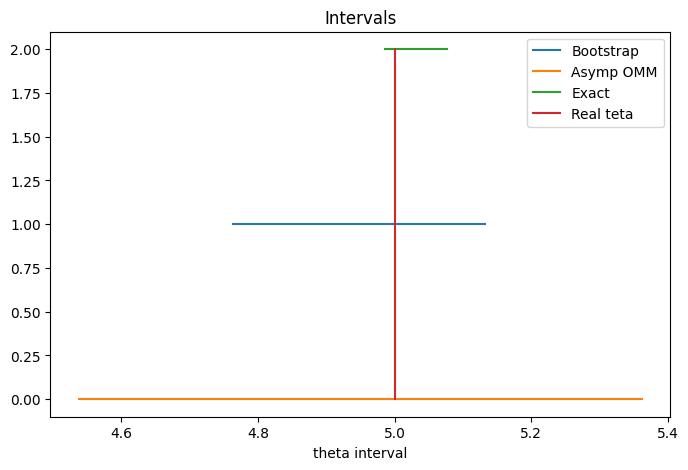

In [19]:

fig, ax = plt.subplots(figsize=(8,5))

ax.plot([bt_1, bt_2], [1, 1], label = 'Bootstrap')
ax.plot([t1_as_omm, t2_as_omm], [0, 0], label = 'Asymp OMM')
ax.plot([t1_ex, t2_ex], [2, 2], label = 'Exact')
ax.plot([teta, teta], [0,2], label = 'Real teta')

ax.set_title('Intervals')    

ax.set_xlabel('theta interval')
ax.legend()